# CUSTOMER CHURN PREDICTION
## DOMAIN - Telecom

## Project Objective:
Build a model that will help to identify the potential customers who have a higher probability to churn. This will help the company to understand the pinpoints and patterns of customer churn and will increase the focus on strategizing customer retention.

### DATA DESCRIPTION:
Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The data set includes information about:

- Customers who left within the last month : the column is called Churn (target)
- Services that each customer has signed up for : phone, multiple lines, internet, online security, onlinebackup,device protection, tech support, and streaming TV and movies
- Customer account information : how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers : gender, age range, and if they have partners and dependents

## STEP 1: IMPORT AND WAREHOUSE DATA

In [43]:
# Importing all required libraries
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [ ]:
!pip install PyMySQL # for creating connection with mysql database
import pymysql

In [10]:
# Connecting to database
connection = pymysql.connect(host='localhost',port=int(3306),user='User_name',passwd='*******',db='telecom')

In [46]:
# cursor = connection.cursor()  # ******** if error use this************
df1 = pd.read_sql('SELECT * FROM telecom.`telcomcustomer-churn_1`', connection)
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [48]:
df1.shape

(7043, 10)

In [21]:
df2 = pd.read_sql('SELECT * FROM telecom.`telcomcustomer-churn_2`', connection)
df2.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [50]:
df2.shape

(7032, 12)

In [458]:
df = pd.merge(df1, df2, on='customerID')
df.shape # merged final dataset has 21 columns and 7032 instances

(7032, 21)

In [459]:
pd.set_option('display.max_columns', None)
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## STEP2: DATA CLEANSING AND EDA

## 2.1 Data Cleansing

In [460]:
# cleaning any missing values
df.isnull().sum()/df.shape[0]*100  #%age of missing values in each column
# output below shows no null values

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [461]:
# checking for duplicate values in the dataset by checking for duplicates in customerID column
duplicates = df.duplicated('customerID').sum()
duplicates
# output below shows no duplicate values

0

In [462]:
# Dropping redundant columns which won't be used in the analysis
df = df.drop('customerID', axis=1)
df.shape

(7032, 20)

In [463]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [464]:
df['SeniorCitizen'].describe()

count    7032.000000
mean        0.162400
std         0.368844
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SeniorCitizen, dtype: float64

In [465]:
# 'SeniorCitizen' being a categorical column, lets replace the numbers with objects(strings)
df['SeniorCitizen'] = df['SeniorCitizen'].replace({0:'Zero', 1:'One'})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,Zero,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,Zero,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,Zero,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,Zero,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,Zero,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [466]:
df.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

So, now there are only 3 continuous variables and rest all as categorical variables.

In [468]:
# encoding the categorical variables
df_encoded = pd.get_dummies(df, columns=['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod'])
df_encoded.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_One,SeniorCitizen_Zero,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,No,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,No,0,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,Yes,0,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,No,0,1,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,Yes,1,0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [469]:
df_encoded.shape

(7032, 47)

## 2.2 EDA

## Statistical Analysis on data:

In [473]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7032 non-null   int64  
 1   MonthlyCharges                           7032 non-null   float64
 2   TotalCharges                             7032 non-null   float64
 3   Churn                                    7032 non-null   object 
 4   gender_Female                            7032 non-null   uint8  
 5   gender_Male                              7032 non-null   uint8  
 6   SeniorCitizen_One                        7032 non-null   uint8  
 7   SeniorCitizen_Zero                       7032 non-null   uint8  
 8   Partner_No                               7032 non-null   uint8  
 9   Partner_Yes                              7032 non-null   uint8  
 10  Dependents_No                            7032 no

* The encoded dataset has 7032 rows and 47 columns
* 3 columns are numeric
* Rest all columns are categorical and the dependent categorical attributes have been encoded using one-hot encoding 
* There are no null values

#### We will be using the original non-encoded dataframe for all the observing and inferencing in Exploratory Data Analysis:

In [474]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


### Observations:
* Tenure - 
 * tenure ranges from 1 to 72 months with mean and median very near
* MonthlyCharges -
 * Ranges from 18 to 118 rupees and again no major difference between mean and median values
* TotalCharges - 
 * Ranges from approx 18 to 8700 rupees with a significant difference between mean(2283) and median(~1400) which shows that    distribution ain't normal for total charges
 * Standard deviation is high which justifies the large range of total charges


In [475]:
df.describe(include='O').transpose()

,count,unique,top,freq
gender,7032,2,Male,3549
SeniorCitizen,7032,2,Zero,5890
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


### Observations:
* Most of the categorical attributes have 2-3 classes
* A larger portion of the customer database is male and youth
* From our target variable (churn), we see that the data is imbalanced and with non-churning customers having much higher number of instances.

## Univariate analysis

<AxesSubplot:xlabel='Churn', ylabel='count'>

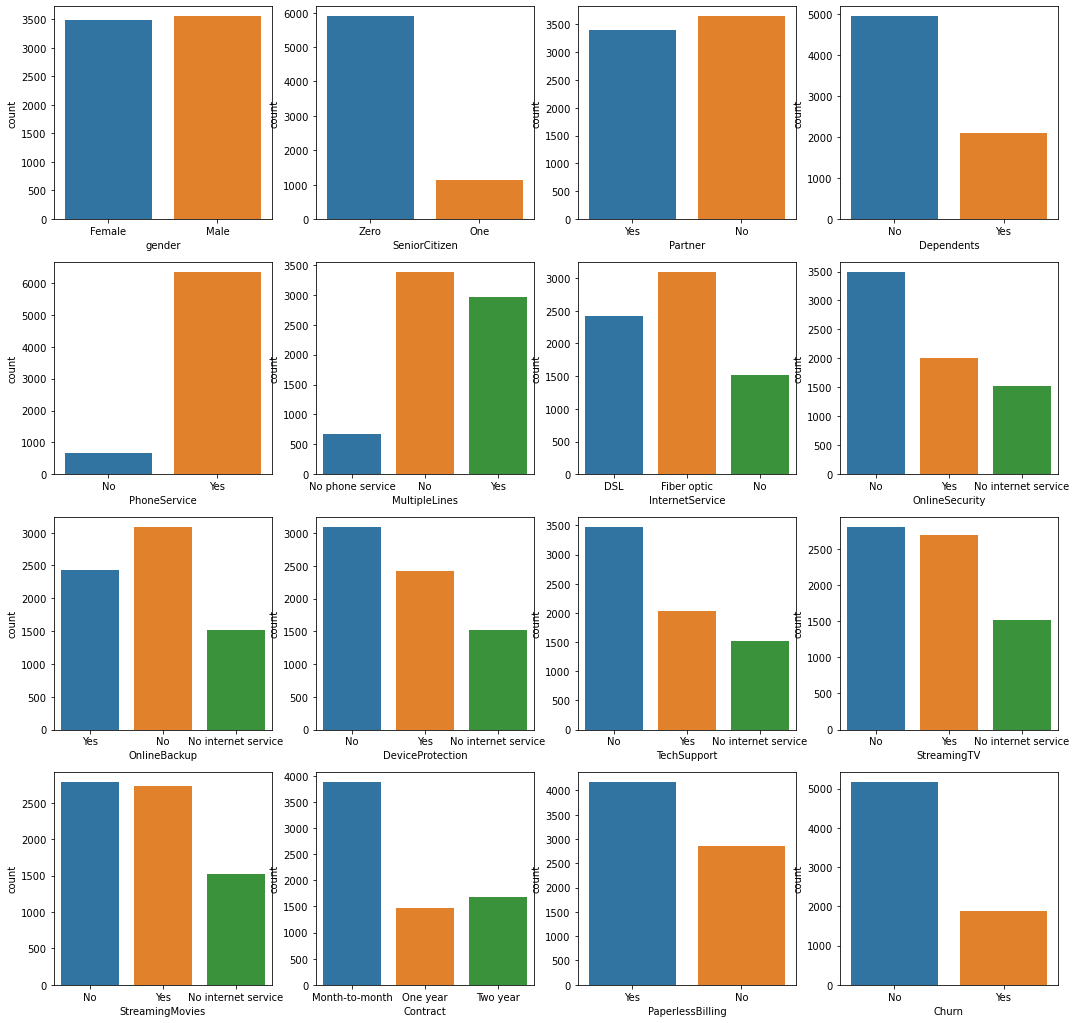

In [476]:
# Univariate analysis of categorical variables using count plot

plt.figure(figsize=(18,18))
plt.subplot(4,4,1)
sns.countplot(x='gender', data=df)
plt.subplot(4,4,2)
sns.countplot(x='SeniorCitizen', data=df)
plt.subplot(4,4,3)
sns.countplot(x='Partner', data=df)
plt.subplot(4,4,4)
sns.countplot(x='Dependents', data=df)
plt.subplot(4,4,5)
sns.countplot(x='PhoneService', data=df)
plt.subplot(4,4,6)
sns.countplot(x='MultipleLines', data=df)
plt.subplot(4,4,7)
sns.countplot(x='InternetService', data=df)
plt.subplot(4,4,8)
sns.countplot(x='OnlineSecurity', data=df)
plt.subplot(4,4,9)
sns.countplot(x='OnlineBackup', data=df)
plt.subplot(4,4,10)
sns.countplot(x='DeviceProtection', data=df)
plt.subplot(4,4,11)
sns.countplot(x='TechSupport', data=df)
plt.subplot(4,4,12)
sns.countplot(x='StreamingTV', data=df)
plt.subplot(4,4,13)
sns.countplot(x='StreamingMovies', data=df)
plt.subplot(4,4,14)
sns.countplot(x='Contract', data=df)
plt.subplot(4,4,15)
sns.countplot(x='PaperlessBilling', data=df)
plt.subplot(4,4,16)
sns.countplot(x='Churn', data=df)

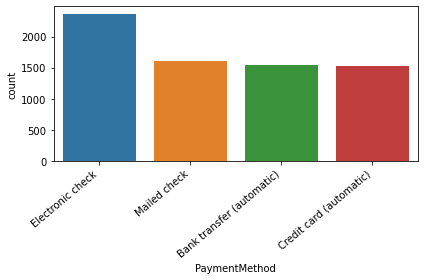

In [477]:
ax = sns.countplot(x="PaymentMethod", data=df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

### Observations:
* There is great imbalance in classes for 2-class attributes like 'Seniorcitizen', 'Dependents', 'PhoneService' and even target variable 'churn'
* Majority of the customers are not senior citizens and they dont have any dependents, which means that the major portion of the customer population is youth.
* Churn shows that there are a lot more customers who have stayed with the company as compared to those who chose to leave.
* Observatins on multi-class attributes:
 * There are only few individuals with no phone service
 * Most of the customers have internet service but those having online security are comparatively less.
 * There's a good percentage of people having 'StreamingTv' and 'StreamingMovies' services.
 * Yearly or 2-yearly contract based customers are less. Most of the customers prefer monthly contract plans.
 * As for payment method, most customers are opting for paperless billing with 'Electronic check' being the most favoured      method of payment. 

## Univariate analysis of continuous variables

In [478]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


<AxesSubplot:xlabel='tenure', ylabel='Density'>

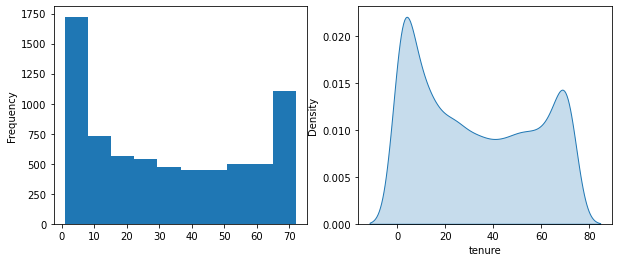

In [480]:
# plotting hist and kde plots for all 3 continuous variables
# Tenure:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
df['tenure'].plot(kind='hist')
plt.subplot(1,2,2)
sns.kdeplot(df.tenure, shade=True)

* Above are the histogram and kde plots for 'tenure'. 
* We can clearly see that there are 2 peaks in the 'tenure' data with the highest frequency between 0-10 months

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

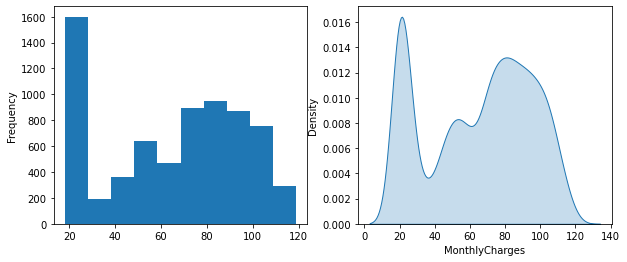

In [481]:
# MonthlyCharges
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
df['MonthlyCharges'].plot(kind='hist')
plt.subplot(1,2,2)
sns.kdeplot(df.MonthlyCharges, shade=True)

* The 'MonthlyCharges' data consists of 3 peaks.
* The 2 highest frequencies are around 20 and 80 rupees.

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

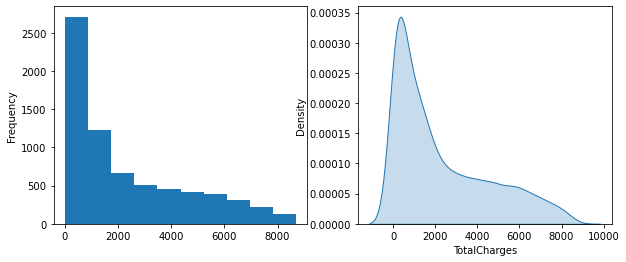

In [482]:
# TotalCharges:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
df['TotalCharges'].plot(kind='hist')
plt.subplot(1,2,2)
sns.kdeplot(df.TotalCharges, shade=True)

* The above plots show that 'TotalCharges' attribute has only 1 peak and is skewed towards right.
* And so the distribution is quite assymetric.
* Most of the instances have value less than 3000 rupees.
* The highest frequncy of total charges is between 0-1000 rupees.

<AxesSubplot:xlabel='TotalCharges'>

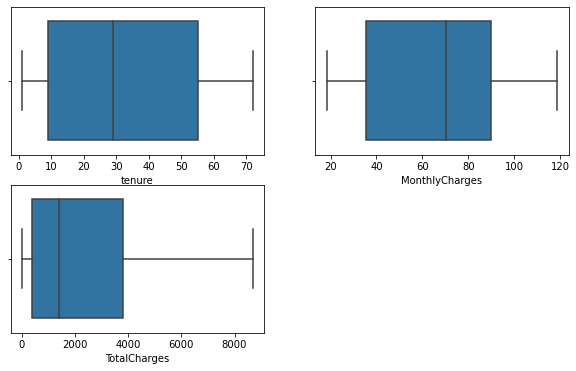

In [483]:
# analysing the continuous variables through boxplots
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.boxplot(x=df['tenure'])
plt.subplot(2,2,2)
sns.boxplot(x=df['MonthlyCharges'])
plt.subplot(2,2,3)
sns.boxplot(x=df['TotalCharges'])

* As from the above boxplots, we again see too assymetric distribution for 'TotalCharges' but there are no outliers for all 3 continuous attributes. 
* We can also see that none of the boxplots indicates towards normal distribution

### Bivariate Analysis of categorical variables:

<AxesSubplot:xlabel='Contract', ylabel='count'>

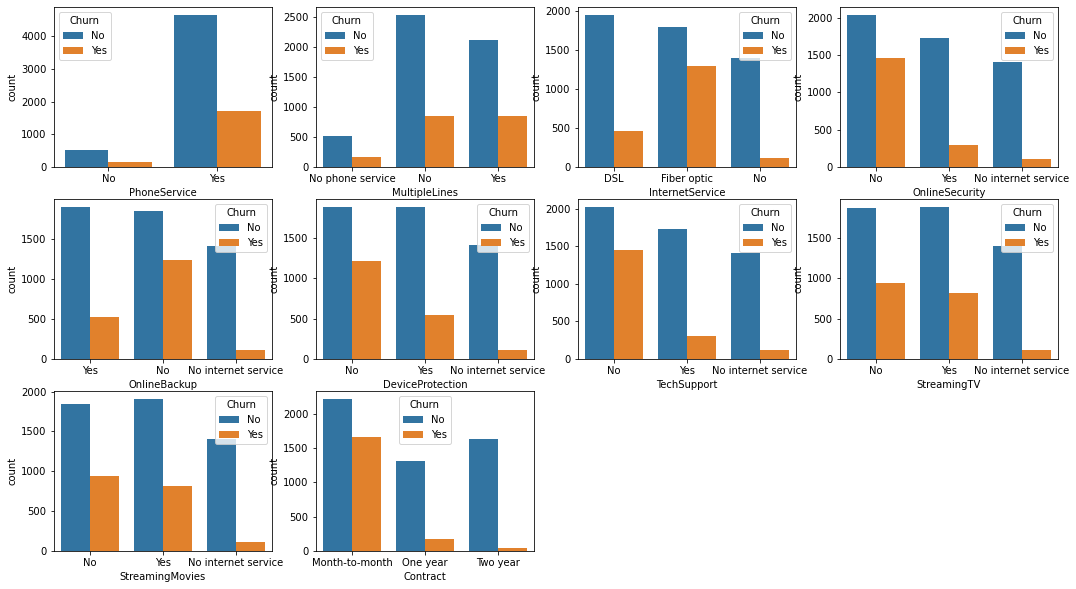

In [484]:
# Comparing Churn with various other categorical attributes using count plot with hue as 'Churn'
plt.figure(figsize=(18,10))
plt.subplot(3,4,1)
sns.countplot(hue=df['Churn'], x=df['PhoneService'])
plt.subplot(3,4,2)
sns.countplot(hue=df['Churn'], x=df['MultipleLines'])
plt.subplot(3,4,3)
sns.countplot(hue=df['Churn'], x=df['InternetService'])
plt.subplot(3,4,4)
sns.countplot(hue=df['Churn'], x=df['OnlineSecurity'])
plt.subplot(3,4,5)
sns.countplot(hue=df['Churn'], x=df['OnlineBackup'])
plt.subplot(3,4,6)
sns.countplot(hue=df['Churn'], x=df['DeviceProtection'])
plt.subplot(3,4,7)
sns.countplot(hue=df['Churn'], x=df['TechSupport'])
plt.subplot(3,4,8)
sns.countplot(hue=df['Churn'], x=df['StreamingTV'])
plt.subplot(3,4,9)
sns.countplot(hue=df['Churn'], x=df['StreamingMovies'])
plt.subplot(3,4,10)
sns.countplot(hue=df['Churn'], x=df['Contract'])

### Onservations:
* Majority customers are having a phone service and most of them dont churn.
* Churning rate doesnt depend too much on weather they have multiple lines or not.
* As for internet service, those with DSL connections or no internet service at all have less churn rate as compared to those having fibre optic connections.
* Those who have subscribed for faicilities like online security, online backup, device protection and tech support show less churn rate as compared to those who dont have these.
* StreamingTV and streaming movies facilities dont have any major effect over churn rate.
* Customers with more than 1 year of contract have a very less churning rate as compared to those with monthly contract. 

<AxesSubplot:xlabel='Dependents', ylabel='count'>

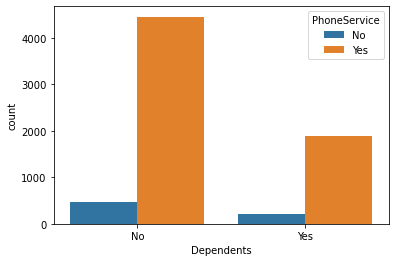

In [486]:
# Another interesting comparison
sns.countplot(x=df['Dependents'], hue=df['PhoneService'])

* We see that mostly customers with no dependents do have a phone service.

### Bivariate analysis of a categorical variable with a numeric variable:

<AxesSubplot:xlabel='gender', ylabel='tenure'>

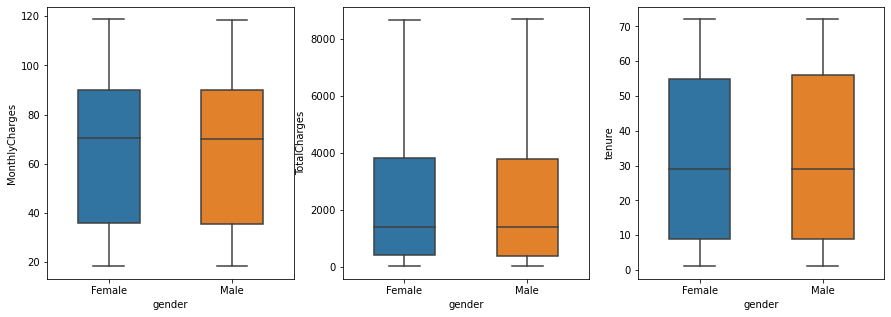

In [487]:
# Gender vs Charges and tenure
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(x=df['gender'], y=df['MonthlyCharges'],width=0.5)
plt.subplot(1,3,2)
sns.boxplot(x=df['gender'], y=df['TotalCharges'],width=0.5)
plt.subplot(1,3,3)
sns.boxplot(x=df['gender'], y=df['tenure'],width=0.5)

* From the above boxplots we can clearly see that gender does not have any effect over the tenure or charges of a customer.

<AxesSubplot:xlabel='SeniorCitizen', ylabel='tenure'>

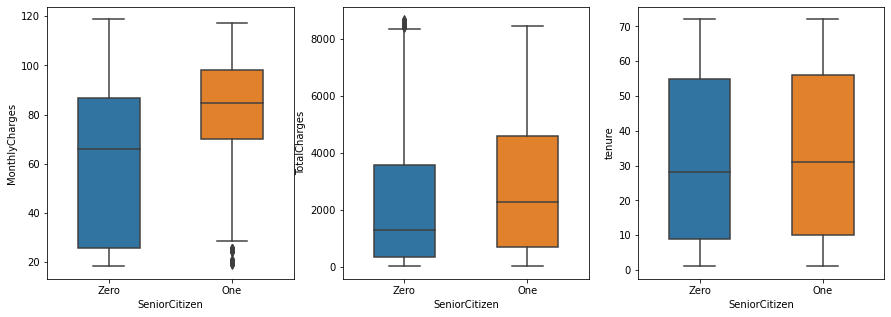

In [488]:
# SeniorCitizen vs Charges and tenure
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(x=df['SeniorCitizen'], y=df['MonthlyCharges'],width=0.5)
plt.subplot(1,3,2)
sns.boxplot(x=df['SeniorCitizen'], y=df['TotalCharges'],width=0.5)
plt.subplot(1,3,3)
sns.boxplot(x=df['SeniorCitizen'], y=df['tenure'],width=0.5)

* The middle line of the box in a boxplot shows the median and the box itself shows the inter quartile range.
* So the above plots show that in general, senior citizens have more monthly and total charges as compared to others.
* We also observe that age is not a major factor when tenure is concerned!

<AxesSubplot:xlabel='Partner', ylabel='tenure'>

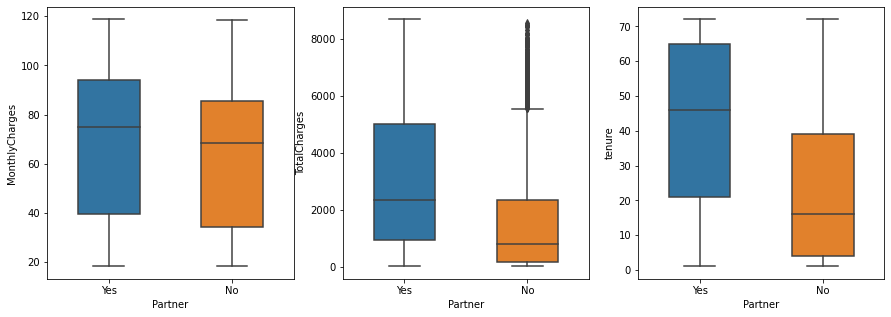

In [489]:
# Partner vs Charges and tenure
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(x=df['Partner'], y=df['MonthlyCharges'],width=0.5)
plt.subplot(1,3,2)
sns.boxplot(x=df['Partner'], y=df['TotalCharges'],width=0.5)
plt.subplot(1,3,3)
sns.boxplot(x=df['Partner'], y=df['tenure'],width=0.5)

* Here we see that customers having partners have a higher average of monthly as well as total charges.
* Customers with partners also have a longer average tenure.

<AxesSubplot:xlabel='Dependents', ylabel='tenure'>

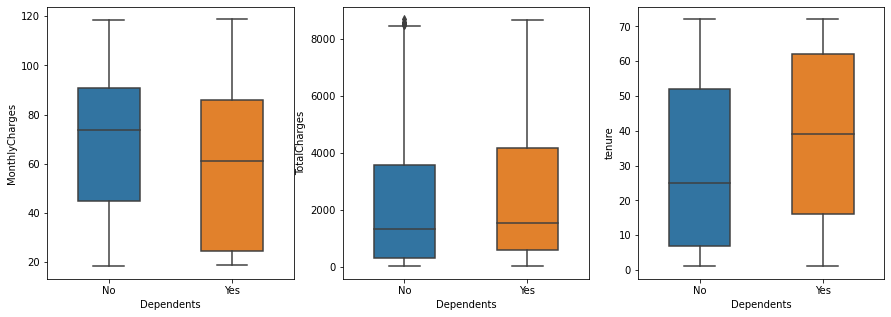

In [490]:
# Dependents vs Charges and tenure
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(x=df['Dependents'], y=df['MonthlyCharges'],width=0.5)
plt.subplot(1,3,2)
sns.boxplot(x=df['Dependents'], y=df['TotalCharges'],width=0.5)
plt.subplot(1,3,3)
sns.boxplot(x=df['Dependents'], y=df['tenure'],width=0.5)

* Those without dependents incur more monthly charges on average.
* Total charges are not affected by dependents.
* Those with dependents have a longer tenure in general but the inter quartile range do not differ significantly!

### Multivariate analysis:

<AxesSubplot:>

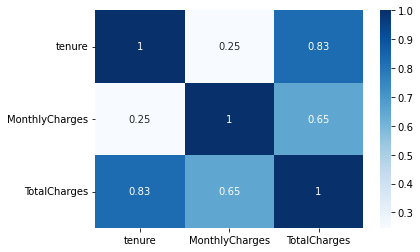

In [491]:
# Heatmap for checking correlation between continuous variables
sns.heatmap(df.corr(), cmap='Blues', annot=True)

* There is high correlation between tenure and and total charges as well as monthly charges and total charges which is kind of obvious as total charges will only increase with tenure and is a multiple of monthly charges
* But an important observation is that there is very small correlation between monthly charges and tenure which tells us that it is not necessary that customers with long tenure are ready to spend more on their monthly plans.

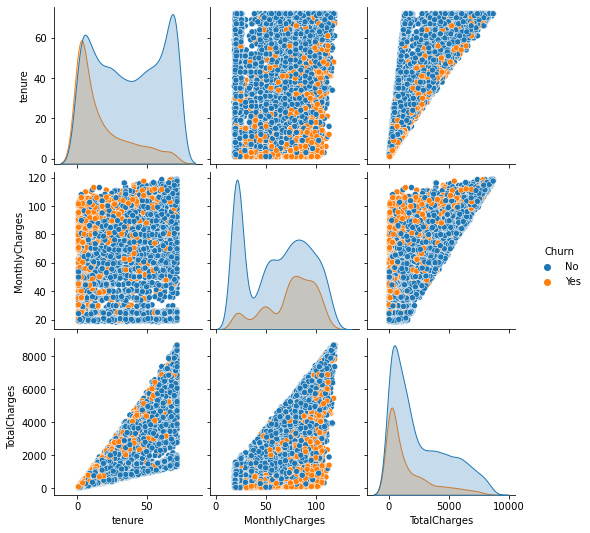

In [493]:
# Pairplot with hue as 'churn'
sns.pairplot(data=df, hue='Churn')

* Similarly from the pairplot also we can see that there's nearly no correlation between monthly charges and tenure but both tenure and monthly charges surely have a linear relation wtih the maximum value of total charges.
* Also from the kde plots in the diagonal we see that those who churn are concentrated towards lower tenure and higher monthly charges values!

##  STEP3: DATA PREPARATION FOR MODEL BUILDING

In [494]:
df['Churn'].describe()

count     7032
unique       2
top         No
freq      5163
Name: Churn, dtype: object

We see that the non churning class has majority of the instances(almost 70%), thus the models will be able to predict better for this class as compared to churning customers class.

### Separating dataset into dependent and indepent variables

In [495]:
Df = df_encoded.copy() # using a copy of the encoded dataset for model building 
Df_features = Df.drop(labels=['Churn'], axis=1) # dropping the dependent variable
Df_features.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_One,SeniorCitizen_Zero,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,0,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,1,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [496]:
Df_features.shape

(7032, 46)

In [497]:
Df_labels = Df['Churn']
Df_labels

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7027     No
7028     No
7029     No
7030    Yes
7031     No
Name: Churn, Length: 7032, dtype: object

In [498]:
X = np.array(Df_features) # creating dependent variable numpy array

In [499]:
y = np.array(Df['Churn'])

In [500]:
y.shape

(7032,)

### Splitting data into test and train sets

In [501]:
Df_features_train, Df_features_test, Df_labels_train, Df_labels_test = train_test_split(Df_features, Df_labels, test_size=0.3, random_state=4)

### Standardizinig data using z-score

In [502]:
Df_features_train_z = Df_features_train.apply(zscore)

In [503]:
Df_features_test_z = Df_features_test.apply(zscore)

In [504]:
Df_features_train_z

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_One,SeniorCitizen_Zero,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3477,-0.580497,0.432946,-0.403578,1.000813,-1.000813,-0.447759,0.447759,0.963682,-0.963682,0.650350,-0.650350,-0.320310,0.320310,1.025936,-0.320310,-0.850523,-0.724419,1.128003,-0.524528,0.997565,-0.524528,-0.628275,-0.882145,-0.524528,1.372994,-0.892752,-0.524528,1.391044,1.013912,-0.524528,-0.640874,1.222570,-0.524528,-0.788509,1.224641,-0.524528,-0.789865,0.902346,-0.512858,-0.562803,1.208209,-1.208209,-0.533021,-0.522953,1.410129,-0.545576
4746,1.451221,-1.316773,-0.241325,-0.999188,0.999188,-0.447759,0.447759,-1.037686,1.037686,0.650350,-0.650350,-0.320310,0.320310,-0.974720,-0.320310,1.175747,-0.724419,-0.886522,1.906476,-1.002441,1.906476,-0.628275,-0.882145,1.906476,-0.728336,-0.892752,1.906476,-0.718885,-0.986279,1.906476,-0.640874,-0.817949,1.906476,-0.788509,-0.816566,1.906476,-0.789865,-1.108223,-0.512858,1.776821,1.208209,-1.208209,1.876098,-0.522953,-0.709155,-0.545576
6136,1.410587,-0.352846,0.590903,1.000813,-1.000813,-0.447759,0.447759,-1.037686,1.037686,-1.537635,1.537635,3.121975,-3.121975,-0.974720,3.121975,-0.850523,1.380416,-0.886522,-0.524528,-1.002441,-0.524528,1.591660,-0.882145,-0.524528,1.372994,-0.892752,-0.524528,1.391044,-0.986279,-0.524528,1.560369,-0.817949,-0.524528,1.268216,1.224641,-0.524528,-0.789865,-1.108223,-0.512858,1.776821,1.208209,-1.208209,-0.533021,1.912217,-0.709155,-0.545576
2197,-1.027475,0.176565,-0.794746,-0.999188,0.999188,2.233346,-2.233346,-1.037686,1.037686,0.650350,-0.650350,-0.320310,0.320310,1.025936,-0.320310,-0.850523,-0.724419,1.128003,-0.524528,0.997565,-0.524528,-0.628275,1.133601,-0.524528,-0.728336,1.120132,-0.524528,-0.718885,1.013912,-0.524528,-0.640874,1.222570,-0.524528,-0.788509,1.224641,-0.524528,-0.789865,0.902346,-0.512858,-0.562803,-0.827671,0.827671,-0.533021,-0.522953,-0.709155,1.832924
3816,-1.068109,0.974011,-0.772269,1.000813,-1.000813,-0.447759,0.447759,-1.037686,1.037686,-1.537635,1.537635,-0.320310,0.320310,-0.974720,-0.320310,1.175747,-0.724419,1.128003,-0.524528,0.997565,-0.524528,-0.628275,-0.882145,-0.524528,1.372994,-0.892752,-0.524528,1.391044,1.013912,-0.524528,-0.640874,-0.817949,-0.524528,1.268216,1.224641,-0.524528,-0.789865,0.902346,-0.512858,-0.562803,-0.827671,0.827671,-0.533021,-0.522953,-0.709155,1.832924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6017,-0.783669,-1.509892,-0.898108,1.000813,-1.000813,-0.447759,0.447759,0.963682,-0.963682,0.650350,-0.650350,-0.320310,0.320310,1.025936,-0.320310,-0.850523,-0.724419,-0.886522,1.906476,-1.002441,1.906476,-0.628275,-0.882145,1.906476,-0.728336,-0.892752,1.906476,-0.718885,-0.986279,1.906476,-0.640874,-0.817949,1.906476,-0.788509,-0.816566,1.906476,-0.789865,0.902346,-0.512858,-0.562803,1.208209,-1.208209,-0.533021,1.912217,-0.709155,-0.545576
709,-1.271281,-1.506562,-0.991416,-0.999188,0.999188,-0.447759,0.447759,0.963682,-0.963682,0.650350,-0.650350,-0.320310,0.320310,1.025936,-0.320310,-0.85

In [505]:
Df_features_test_z

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_One,SeniorCitizen_Zero,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6027,0.830870,1.513164,1.580233,1.029829,-1.029829,-0.422813,0.422813,-1.030806,1.030806,0.656871,-0.656871,-0.342906,0.342906,1.066673,-0.342906,-0.863275,-0.72123,1.126418,-0.526536,-0.976578,-0.526536,1.546701,-0.890333,-0.526536,1.390910,-0.871665,-0.526536,1.359229,-0.990566,-0.526536,1.573567,-0.810062,-0.526536,1.259279,-0.790935,-0.526536,1.229595,-1.107131,1.928823,-0.558009,1.202065,-1.202065,-0.522863,-0.530938,1.392379,-0.538999
1200,-0.604412,-1.299640,-0.816091,-0.971035,0.971035,-0.422813,0.422813,-1.030806,1.030806,-1.522370,1.522370,2.916248,-2.916248,-0.937494,2.916248,-0.863275,1.38652,-0.887770,-0.526536,1.023984,-0.526536,-0.646538,1.123175,-0.526536,-0.718954,1.147230,-0.526536,-0.735711,1.009524,-0.526536,-0.635499,1.234473,-0.526536,-0.794105,1.264327,-0.526536,-0.813276,0.903236,-0.518451,-0.558009,1.202065,-1.202065,-0.522863,1.883458,-0.718195,-0.538999
5708,1.486999,-0.273190,0.739657,-0.971035,0.971035,2.365111,-2.365111,-1.030806,1.030806,0.656871,-0.656871,2.916248,-2.916248,-0.937494,2.916248,-0.863275,1.38652,-0.887770,-0.526536,-0.976578,-0.526536,1.546701,-0.890333,-0.526536,1.390910,1.147230,-0.526536,-0.735711,1.009524,-0.526536,-0.635499,-0.810062,-0.526536,1.259279,-0.790935,-0.526536,1.229595,-1.107131,-0.518451,1.792087,1.202065,-1.202065,-0.522863,1.883458,-0.718195,-0.538999
1734,-1.301550,0.168846,-0.993751,-0.971035,0.971035,-0.422813,0.422813,0.970115,-0.970115,0.656871,-0.656871,-0.342906,0.342906,1.066673,-0.342906,-0.863275,-0.72123,1.126418,-0.526536,1.023984,-0.526536,-0.646538,1.123175,-0.526536,-0.718954,1.147230,-0.526536,-0.735711,1.009524,-0.526536,-0.635499,1.234473,-0.526536,-0.794105,1.264327,-0.526536,-0.813276,0.903236,-0.518451,-0.558009,-0.831902,0.831902,-0.522863,-0.530938,1.392379,-0.538999
4973,-0.768445,-0.465235,-0.706758,-0.971035,0.971035,-0.422813,0.422813,0.970115,-0.970115,0.656871,-0.656871,2.916248,-2.916248,-0.937494,2.916248,-0.863275,1.38652,-0.887770,-0.526536,1.023984,-0.526536,-0.646538,1.123175,-0.526536,-0.718954,-0.871665,-0.526536,1.359229,1.009524,-0.526536,-0.635499,-0.810062,-0.526536,1.259279,-0.790935,-0.526536,1.229595,0.903236,-0.518451,-0.558009,-0.831902,0.831902,-0.522863,-0.530938,1.392379,-0.538999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,0.789862,0.875771,1.090401,-0.971035,0.971035,-0.422813,0.422813,0.970115,-0.970115,0.656871,-0.656871,-0.342906,0.342906,1.066673,-0.342906,-0.863275,-0.72123,1.126418,-0.526536,-0.976578,-0.526536,1.546701,1.123175,-0.526536,-0.718954,-0.871665,-0.526536,1.359229,1.009524,-0.526536,-0.635499,-0.810062,-0.526536,1.259279,1.264327,-0.526536,-0.813276,-1.107131,1.928823,-0.558009,1.202065,-1.202065,-0.522863,-0.530938,1.392379,-0.538999
35,1.610024,1.162184,2.212479,1.029829,-1.029829,-0.422813,0.422813,-1.030806,1.030806,-1.522370,1.522370,-0.342906,0.342906,-0.937494,-0.342906,1.158379,-0.72123,

In [506]:
# converting these processed datasets from dataframes to numpy arrays 
X_train = np.array(Df_features_train_z)
X_test = np.array(Df_features_test_z)
y_train = np.array(Df_labels_train)
y_test = np.array(Df_labels_test)

## Step4: Model Training and Testing

### Applying Logistic Regression Model

In [507]:
model_LogReg = LogisticRegression()
model_LogReg.fit(X_train, y_train)
y_predict = model_LogReg.predict(X_test)

In [508]:
coef_df = pd.DataFrame(model_LogReg.coef_, columns=list(Df_features_train.columns))
coef_df['intercept'] = model_LogReg.intercept_
coef_df

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_One,SeniorCitizen_Zero,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,intercept
0,-1.5464,-0.319425,0.776486,-0.002068,0.002068,0.055382,-0.055382,-0.008837,0.008837,0.005335,-0.005335,0.033818,-0.033818,-0.062545,0.033818,0.043439,-0.23453,0.275225,-0.061252,0.102717,-0.061252,-0.058079,0.062634,-0.061252,-0.012348,0.017324,-0.061252,0.035002,0.119109,-0.061252,-0.075619,-0.053393,-0.061252,0.105638,-0.040576,-0.061252,0.092669,0.288131,-0.01974,-0.316534,-0.104604,0.104604,-0.001509,-0.059153,0.113907,-0.068574,-1.773897


In [509]:
# Train accuracy
LogReg_train = model_LogReg.score(X_train, y_train)
LogReg_train

0.8071921982933766

In [510]:
# Test accuracy
LogReg_test = model_LogReg.score(X_test, y_test)
LogReg_test

0.8042654028436019

* We observe that train and test accuracies are alomst equal which is a good indication that the model does not suffer from offerfitting or underfitting !
* And also the accuracy score itself is quite good (80%)

In [511]:
metrics.confusion_matrix(y_test, y_predict)

array([[1374,  152],
       [ 261,  323]], dtype=int64)

* Although the overall accuracy is a good percentage, we observe from confusion matrix that false negatives(261) are still a lot when compared with the true negatives(323).
* This shows that when independent attribute has huge imbalance in its classes, then we can't just rely on overall accuracy for performance metrics of the model. The model might be biased towards the class with higher number of instances as is the case here.

In [512]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1526
         Yes       0.68      0.55      0.61       584

    accuracy                           0.80      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.80      0.80      2110



### Applying KNN Model

In [513]:
model_KNN = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
model_KNN.fit(X_train, y_train)
y_predict_KNN = model_KNN.predict(X_test)

In [514]:
# Train accuracy
KNN_train = model_KNN.score(X_train, y_train)
KNN_train

0.9989841527834213

In [515]:
# Test accuracy
KNN_test = model_KNN.score(X_test, y_test)
KNN_test

0.7440758293838863

* The train accuracy is almost 100 % while test accuracy is just 74%
* This shows that the model is overfitted !

In [516]:
metrics.confusion_matrix(y_test, y_predict_KNN)

array([[1295,  231],
       [ 309,  275]], dtype=int64)

In [517]:
print(metrics.classification_report(y_test, y_predict_KNN))

              precision    recall  f1-score   support

          No       0.81      0.85      0.83      1526
         Yes       0.54      0.47      0.50       584

    accuracy                           0.74      2110
   macro avg       0.68      0.66      0.67      2110
weighted avg       0.73      0.74      0.74      2110



* The test accuracy is less as compared to logistic regression model
* From the confusion matrix we see that false negatives have become even higher in number than true negatives although true positives are very high as compared to false positives which again reflects the ill-effects of imbalance in the data of  independent variable on performance of the model. 

### Applying Naive Bayes Model

In [518]:
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

GaussianNB()

In [519]:
# Test accuracy
expected = y_test
predicted = model_NB.predict(X_test)
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

          No       0.92      0.65      0.76      1526
         Yes       0.48      0.84      0.61       584

    accuracy                           0.71      2110
   macro avg       0.70      0.75      0.69      2110
weighted avg       0.80      0.71      0.72      2110



* Precision-   It tells us, from all the instances that you predicted belonging to a particular class, how many did you       predict accurately .
  As expected, precision is good for 'No' class of 'Churn' as it has greater number of instances and it is very low for the   'yes' class
  
* Recall -   It tells us, from all the actual instances of a particular class how many were you able to predict correctly.
  Now since there is a trade-off between recall and precision so we are getting higher recall for 'Yes' class as compared     to 'No' class.
  
* f1-score -   When both false positives and false negatives are undesirable, we use f1-score metric to assess our model's   performance. More closer the value to 1, better the model. 
  Here, f1-score is OK but not that good for both the classes.
  
* Overall accuracy of the Naive Bayes model is 71% which is also not as good as compared to previous models

In [520]:
# Train accuracy
predicted_train = model_NB.predict(X_train)
NB_train = metrics.accuracy_score(y_train, predicted_train)
NB_train

0.6948394961397806

In [521]:
# Test accuracy
NB_test = metrics.accuracy_score(expected, predicted)
NB_test

0.7066350710900474

* The train and test accuracies are almost same which shows model is safe from overfitting and underfitting

In [522]:
metrics.confusion_matrix(expected, predicted)

array([[998, 528],
       [ 91, 493]], dtype=int64)

* Although True negatives score has improved, there is a drop in true positives predicted
* False positives number has increased

### Comparing train and test accuracies for Logistic regression , KNN and Naive Bayes Models

In [523]:
# Observing the various performance metrics of all the 3 models
# Precision, recall and f1-score is here for 'Yes' class since the class of customers churning will be more useful
comp_df = pd.DataFrame({'Train':[LogReg_train, KNN_train, NB_train], 'Test':[LogReg_test, KNN_test, NB_test]}, index=['LogReg', 'KNN', 'NaiveBayes'])
comp_df

,Train,Test
LogReg,0.807192,0.804265
KNN,0.998984,0.744076
NaiveBayes,0.694839,0.706635


* We observe that train accuracy of KNN is almost 100% while its test accuracy is just 74%.
  It shows overfiting in KNN model.
* Train and test accuracies are almost equal for both logistic regression and Naive Bayes models but the accuracy is higher   for logistic regression.  


### Final Best Trained Model

* From train and test accuracies of KNN model we observe that imbalance in data is causing a very heavy overfitting in the   model. So we discard KNN model.
* Now, we observed that accuracy of logistic regression is much higher than Naive Bayes but beacause of the major imbalance   in data let us have a look on other metrics like precision, recall etc. too.
  

In [524]:
#Logistic Regression
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1526
         Yes       0.68      0.55      0.61       584

    accuracy                           0.80      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.80      0.80      2110



In [525]:
# Naive Bayes
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

          No       0.92      0.65      0.76      1526
         Yes       0.48      0.84      0.61       584

    accuracy                           0.71      2110
   macro avg       0.70      0.75      0.69      2110
weighted avg       0.80      0.71      0.72      2110



* From above metrics since for the 2 classes, 'Yes' and 'No', precision and recall say differently, ie. they dont give any consistent observations on which model to choose, we will use f1-score to select model
* F1- score for 'Yes' class is same for both models (0.61)
* F1-score for 'No' class is higher for logistic regression model(0.87) as comparerd to Naive Bayes model(0.76) so we will select Logistic regression as our final model.


#### Final Model Selected = Logistic Regression

# # Step5: Conclusion

Concluding this case-study we can say that for selecting our machine learning model we should take care of the following:
 * An imbalance in dataset should be avoided but if it is present then we should not select our model based purely on overall accuracy but observe other metrics as well.
 * The accuracies can be misleading
 * we should also comapare train and test accuracies to check if there is overfitting or underfitting of our model